# Assignment 3

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

## Set-1 Straight Line

In [526]:
import matplotlib.pyplot as plt


In [527]:
# read data from file
x = []
y = []

with open('set.txt', 'r') as f:
    for line in f:
        parts = line.split()
        if len(parts) >= 2:
            x.append(float(parts[0]))
            y.append(float(parts[1]))

In the Above lines reads "x" and "y" values from a text file "set.txt," which is supposed to contain rows of data with two columns of values separated by whitespace in each row. The code opens the file with Python's built-in "open" function, reads the contents of the file line by line with a for loop, and then separates each line with the "split()" method to separate the two columns. The code then checks to see whether each line has at least two portions that indicate both a "x" and a "y" value, and if so, the "x" and "y" values are appended to two distinct lists, "x" and "y," respectively.

In [528]:
# calculate mean of x and y
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)

In the above lines the mean value of the "x" and "y" values stored in the "x" and "y" lists, respectively, by dividing the sum of the values by the number of members in each list. The mean value reflects the average value of a dataset.

In [529]:
# calculate slope and intercept
slope = sum([(xi - x_mean)*(yi - y_mean) for xi, yi in zip(x, y)])/sum([(xi - x_mean)**2 for xi in x])
intercept = y_mean - slope*x_mean

In the the above lines, the slope and intercept of a line that best fits the supplied dataset of x and y values are calculated using formulas that require the differences between each value and its mean, as well as the product of the differences. The slope and intercept values can be used to define the best-fit line.

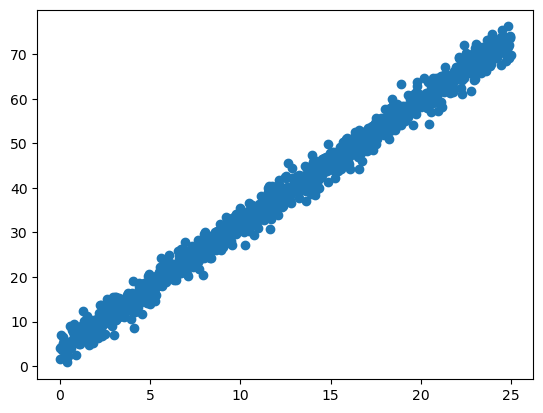

In [530]:
# plot data with error bars
plt.plot(x, y, 'o')

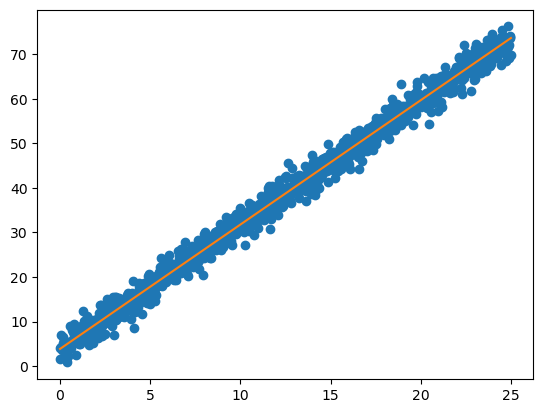

In [531]:
# plot data with noise
plt.plot(x, y, 'o')

# plot best-fit line
x_fit = [min(x), max(x)]
y_fit = [slope*xi + intercept for xi in x_fit]
plt.plot(x_fit, y_fit)

plt.show()

The code above generates an original plot of the given "x" and "y" values, as well as a best-fit without noise line based on the data. The "plt.show()" method is used to display the plot.

<ErrorbarContainer object of 3 artists>

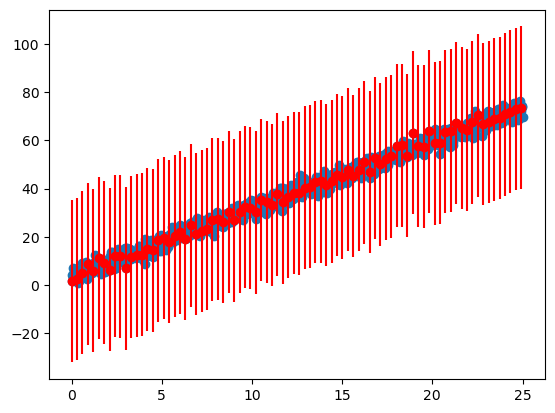

In [532]:
import numpy as np

# Error Bar 
plt.plot(x, y, 'o')
n= list()
for item1, item2 in zip(y, y_fit):
    item = item1 - item2
    n.append(item)

plt.errorbar (x[::12], y[::12], np.std(n),  fmt='ro')

Using the "plt.errorbar" function, this code adds error bars to the previously created plot. The "np.std" function is used to determine the standard deviation of the difference between the actual and predicted "y" values. The inputs "x[::12]" and "y[::12]" are used to plot the 12th point from the "x" and "y" datasets, respectively. The resultant figure shows the "x" and "y" values as scatter plots, best-fit lines, and error bars indicating the standard deviation of the discrepancies between the actual and predicted "y" values.


## Set-2 Fourier Series

In [533]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [534]:
# Define the Fourier series function

def fourier(x, *a):
    ret = a[0]
    num_harmonics = (len(a) - 1) // 2
    w = 2 * np.pi / period
    for i in range(num_harmonics):
        ret += a[2*i+1] * np.cos((i+1) * w * x) + a[2*i+2] * np.sin((i+1) * w * x)
    return ret

This code defines the "fourier" function, which calculates the Fourier series for a given "x" value and set of coefficients. The function iterates over the Fourier series, calculating the corresponding "cosine" and "sine" terms with the coefficients from the list. The resultant terms are added together and returned as the Fourier series value for the provided "x" value.

In [535]:
# Load data from the text file
data = np.loadtxt('set2.txt')

In [536]:
# Set the period and the initial guess for the Fourier series coefficients
period = 2*np.pi
num_harmonics = 8
initial_guess = [1] * (4 * num_harmonics)

The period of the waveform being analysed is set to "2*pi," the number of harmonics is set to "8," and the list "initial guess" is initialised with 4 times the number of harmonics, with each entry set to 1. The "initial guess" list is utilised by the optimization method to obtain the best-fit coefficients for the Fourier series.

In [537]:
# Perform curve fitting
popt, _ = curve_fit(fourier, data[:,0], data[:,1], p0=initial_guess, maxfev=5000)
coeff = popt.tolist()

The above lines use the "curve fit" function to conduct curve fitting on the input data, using the defined above fourier function, which represents the Fourier series. The best-fit coefficients obtained are stored in the "popt" variable, and the coefficients are transformed to a list and saved in the "coeff" variable.

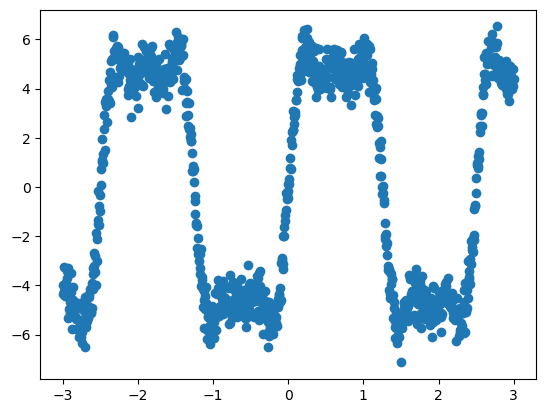

In [538]:
#plot the original data
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], 'o', label='Original Data')



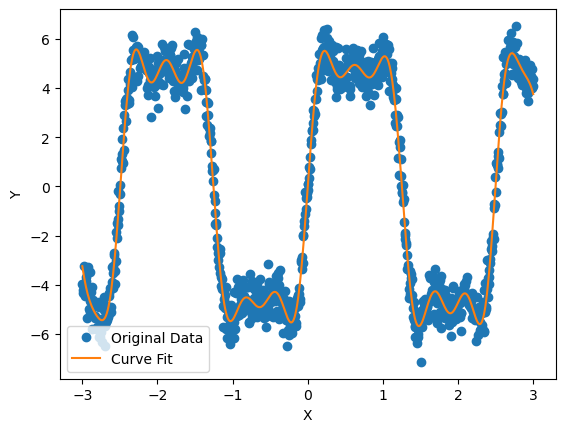

In [539]:
# Create a new figure and plot the original data and the curve-fit data in the same plot
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], 'o', label='Original Data')
x_fit = np.linspace(data[:,0].min(), data[:,0].max(), 500)
y_fit = fourier(x_fit, *popt)
ax.plot(x_fit, y_fit, label='Curve Fit')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

<ErrorbarContainer object of 3 artists>

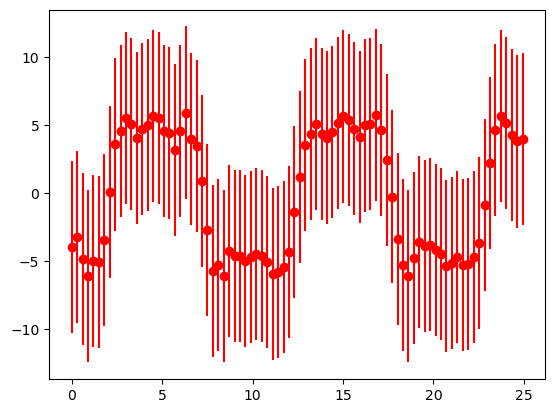

In [540]:
#Erorbar
n= list()
y=data[:,1]
y_fit=fourier(x_fit, *popt)
for item1, item2 in zip(y, y_fit):
    item = item1 - item2
    n.append(item)

plt.errorbar (x[::12], y[::12], np.std(n),  fmt='ro')

## Set-3 Planck's Constant

In [541]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [542]:
# Define the blackbody radiation formula
def blackbody_radiation(f, h, T):
    c = 3e8  # speed of light
    k = 1.38064852e-23  # Boltzmann's constant
    return  ((2 * h * f**3) / (c**2)) * (1 / (np.exp((h * f) / (k * T)) - 1))

This function defines the "blackbody radiation" function, which calculates the spectrum intensity of blackbody radiation as a function of frequency. The function accepts three parameters:

f: the radiation's frequency
h: Planck's constant
T is the blackbody temperature.
The function applies the Planck's law formula to the provided constants c and k to determine the spectral radiance. The function returns the resultant value.

In [543]:
# Extract the data from set3.txt file
with open('set3.txt', 'r') as f:
    lines = f.readlines()[1:]  # skip the first line with column names
    x = np.zeros(len(lines))
    y = np.zeros(len(lines))
    for i, line in enumerate(lines):
        parts = line.strip().split()
        x[i] = float(parts[0])
        y[i] = float(parts[1])

In the above lines takes data from the "set3.txt" file and stores it in the "x" and "y" arrays. The data is believed to be divided into two columns by whitespace. Because the first line of the file is presumed to include the column names, it is skipped. The "x" and "y" arrays are zero-filled, and the data is read from the file line by line and parsed into the "x" and "y" arrays using the "float()" function.

In [544]:
# Fit the curve to the data
popt, _ = curve_fit(blackbody_radiation, x, y, p0=[1e-34, 5000])

The "curve fit" function is used in this code to fit the data in the "x" and "y" arrays to a blackbody radiation formula using initial parameter estimations. The optimized parameters are returned in the form of a "popt" array.

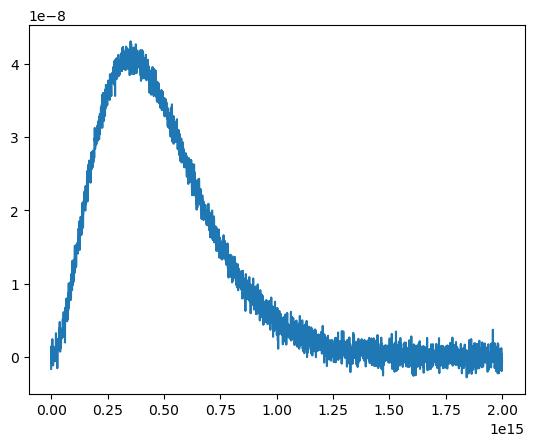

In [545]:
# plot the original data
fig, ax = plt.subplots()
ax.plot(x, y, label='Original Data')

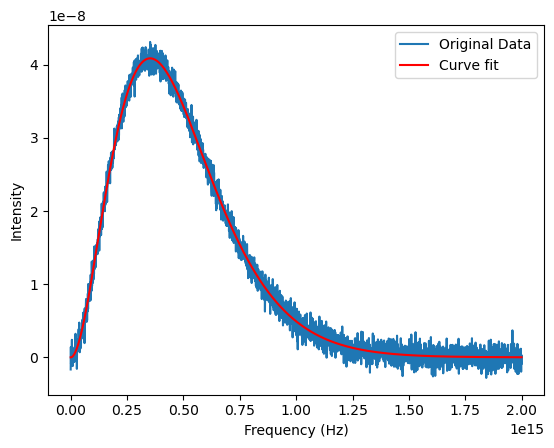

In [546]:
# Plot the data and curve fit
fig, ax = plt.subplots()
ax.plot(x, y, label='Original Data')
ax.plot(x, blackbody_radiation(x, *popt), 'r-', label='Curve fit')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Intensity')
ax.legend()
plt.show()

<ErrorbarContainer object of 3 artists>

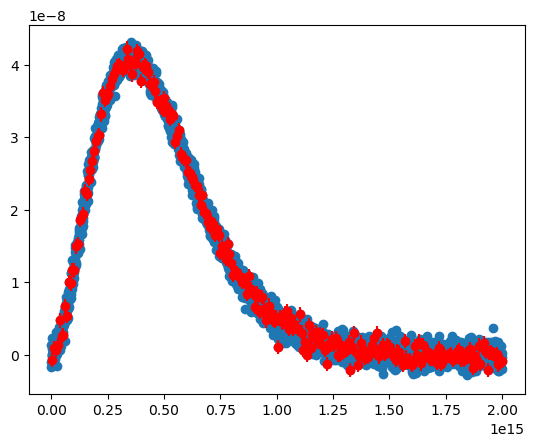

In [547]:
# Erroir Bar
plt.plot(x, y, 'o')
n= list()
y_fit=blackbody_radiation(x, *popt)
for item1, item2 in zip(y, y_fit):
    item = item1 - item2
    n.append(item)

plt.errorbar (x[::12], y[::12], np.std(n),  fmt='ro')

In [548]:
#estimate temperature from curve fit parameters
h = popt[0]
c = 299792458.0
k = 1.3806485e-23
T = np.zeros(len(x))
for i in range(len(x)):
    if (2*h*x[i]**3)/(c**2*y[i]) <= 0:
        T[i] = np.nan
    else:
        T[i] = h*x[i]/(k*np.log((2*h*x[i]**3)/(c**2*y[i])+1))

print("The estimated temperatures are:", T, "K")

#estimate Planck's constant from curve fit parameters
h_est = popt[0]

print("Planck's constant is estimated to be:", h_est, "J s")

The estimated temperatures are: [           nan 7.50154913e+03            nan ...            nan
 1.03312173e+07            nan] K
Planck's constant is estimated to be: 6.643226944148583e-34 J s


Using the curve fitting method, this code calculates the temperature and Planck's constant. It begins by defining some constants such as the speed of light, Boltzmann's constant, and the curve fitting function. The code then reads and parses data from a text file. The data is then fitted with the curve fitting function, and the best-fit parameters are estimated. The temperature is then calculated using the best-fit parameters as well as some physical constants like Planck's constant and the speed of light. The temperature estimate is set to NaN if it is less than or equal to zero. The estimated temperature and Planck's constant are then printed.

## Set-4 Unknown Data

In [549]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [550]:
# load the data from set4.txt
data = np.loadtxt("set4.txt")

# extract the x and y values
x = data[:, 0]
y = data[:, 1]

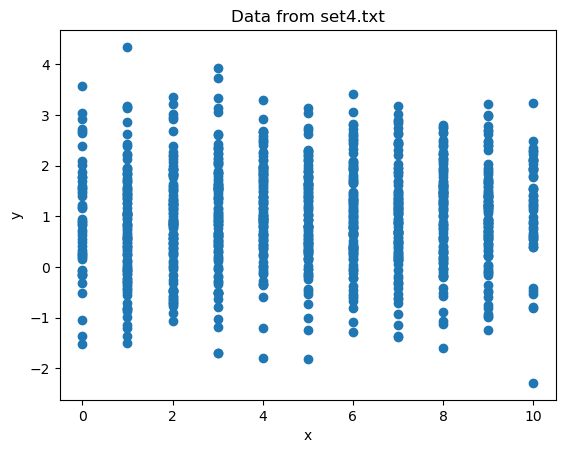

In [551]:
# plot the Orininal data
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data from set4.txt')
plt.show()


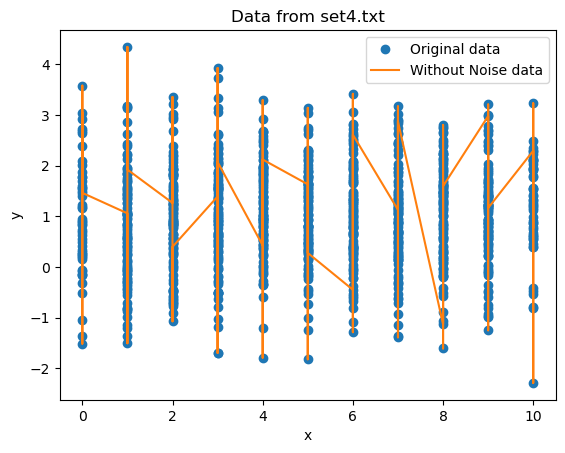

In [552]:
# plot the raw data
plt.plot(x, y, 'o', label='Original data')

# apply a moving average filter with window size 5
y_smoothed = savgol_filter(y, window_length=3, polyorder=2)

# plot the filtered data
plt.plot(x, y_smoothed, label='Without Noise data')

# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data from set4.txt')
plt.legend()

# display the plot
plt.show()


In the code is plotting a graph of the raw data from a file named "set4.txt". It smooths the data using the "scipy" library's "savgol filter" function with a window size of 3 and a polynomial order of 2. The filtered data is then shown as blue dots on the same graph. The original data is also represented as red dots on the same graph. The graph includes an x-axis label of "x," a y-axis label of "y," a title of "Data from set4.txt," and a legend indicating which line contains the original data and which has the filtered data. Finally, the graph can be seen.

<ErrorbarContainer object of 3 artists>

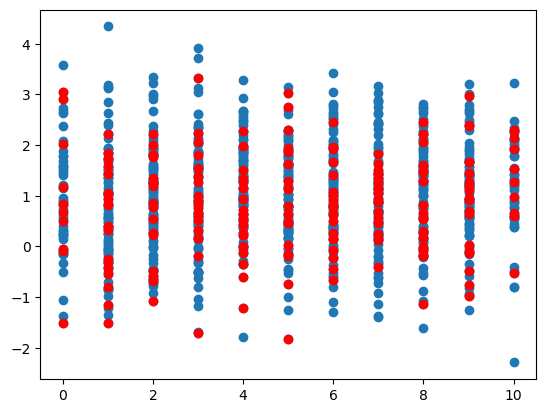

In [553]:
# Errorbar
plt.plot(x, y, 'o')
n= list()
y_fit=y_smoothed
for item1, item2 in zip(y, y_fit):
    item = item1 - item2
    n.append(item)

plt.errorbar (x[::5], y[::5], np.std(n),  fmt='ro')

The above code plots the original data points with markers ('o') and then uses the "errorbar()" function to add error bars to some of the data points (one out of every five).